## Programming Exercise 2: Logistic Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1 Logistic Regression

In [2]:
datafile = 'data/ex2data1.txt'
#!head $datafile
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
##Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
##Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

#### 1.1 Visualizing the data

In [3]:
#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
#Check to make sure I included all entries
#print "Included everything? ",(len(pos)+len(neg) == X.shape[0])

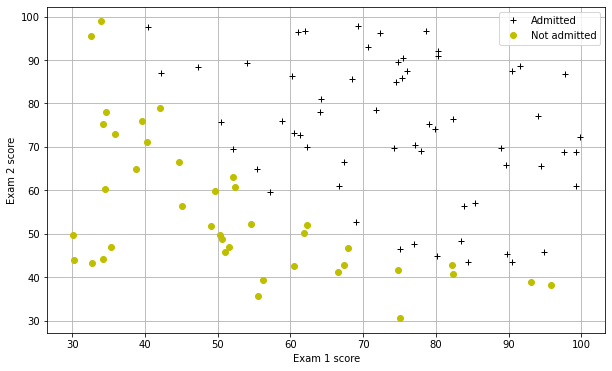

In [4]:
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,1],pos[:,2],'k+',label='Admitted')
    plt.plot(neg[:,1],neg[:,2],'yo',label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
    
plotData()

#### 1.2 Implementation

In [5]:
from scipy.special import expit #Vectorized sigmoid function

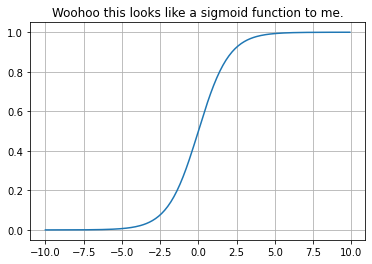

In [6]:
#Quick check that expit is what I think it is
myx = np.arange(-10,10,.1)
plt.plot(myx,expit(myx))
plt.title("Woohoo this looks like a sigmoid function to me.")
plt.grid(True)

\begin{equation}
term1=-y^T\log(h _\theta(X))
\end{equation}
\begin{equation}
term2=(1-y)\log(1-h _\theta(X))
\end{equation}

In [8]:
#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))

#Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    Note this includes regularization, if you set mylambda to nonzero
    For the first part of the homework, the default 0. is used for mylambda
    """
    #note to self: *.shape is (rows, columns)
    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [9]:
print("X:", X.shape)
print("theta:", np.zeros((X.shape[1],1)).shape)

X: (100, 3)
theta: (3, 1)


In [13]:
initial_theta = np.zeros((X.shape[1],1))
term1 = np.dot(-np.array(y).T,np.log(h(initial_theta,X)))
term2 = np.dot((1-np.array(y)).T,np.log(1-h(initial_theta,X)))
print("term1:", term1.shape)
print("term2:", term2.shape)
term1 - term2

term1: (1, 1)
term2: (1, 1)


array([[69.31471806]])

In [8]:
#Check that with theta as zeros, cost returns about 0.693:
initial_theta = np.zeros((X.shape[1],1))
computeCost(initial_theta,X,y)

0.6931471805599453

In [ ]:
optimize.fmin(
    computeCost, # Cost function
    x0=mytheta, # Parameters for tuning
    args=(myX, myy, mylambda), # Parameters for Cost function
    maxiter=400, # Max iteration
    full_output=True
)

In [16]:
#An alternative to OCTAVE's 'fminunc' we'll use some scipy.optimize function, "fmin"
#Note "fmin" does not need to be told explicitly the derivative terms
#It only needs the cost function, and it minimizes with the "downhill simplex algorithm."
#http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.fmin.html
from scipy import optimize

def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy, mylambda), maxiter=400, full_output=True)
    return result[0], result[1]


In [17]:
theta, mincost = optimizeTheta(initial_theta,X,y)
#That's pretty cool. Black boxes ftw

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [19]:
#"Call your costFunction function using the optimal parameters of θ. 
#You should see that the cost is about 0.203."
print(computeCost(theta,X,y))

0.2034977015902151


In [22]:
X[:,1]

array([34.62365962, 30.28671077, 35.84740877, 60.18259939, 79.03273605,
       45.08327748, 61.10666454, 75.02474557, 76.0987867 , 84.43281996,
       95.86155507, 75.01365839, 82.30705337, 69.36458876, 39.53833914,
       53.97105215, 69.07014406, 67.94685548, 70.66150955, 76.97878373,
       67.37202755, 89.67677575, 50.53478829, 34.21206098, 77.92409145,
       62.27101367, 80.19018075, 93.1143888 , 61.83020602, 38.7858038 ,
       61.37928945, 85.40451939, 52.10797973, 52.04540477, 40.23689374,
       54.63510555, 33.91550011, 64.17698887, 74.78925296, 34.18364003,
       83.90239366, 51.54772027, 94.44336777, 82.36875376, 51.04775177,
       62.22267576, 77.19303493, 97.77159928, 62.0730638 , 91.5649745 ,
       79.94481794, 99.27252693, 90.54671411, 34.52451385, 50.28649612,
       49.58667722, 97.64563396, 32.57720017, 74.24869137, 71.79646206,
       75.39561147, 35.28611282, 56.2538175 , 30.05882245, 44.66826172,
       66.56089447, 40.45755098, 49.07256322, 80.27957401, 66.74

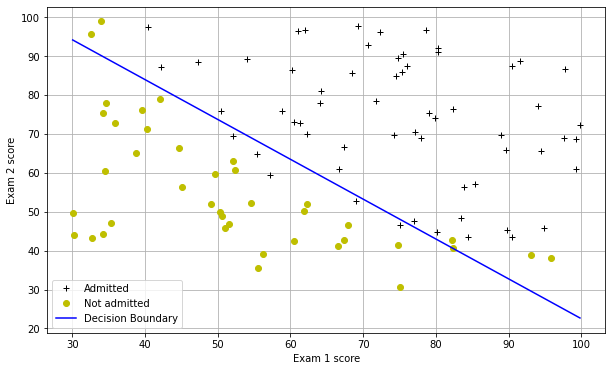

In [21]:
#Plotting the decision boundary: two points, draw a line between
#Decision boundary occurs when h = 0, or when
#theta0 + theta1*x1 + theta2*x2 = 0
#y=mx+b is replaced by x2 = (-1/thetheta2)(theta0 + theta1*x1)

boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*boundary_xs)
plotData()
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()

In [23]:
#For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
#you should expect to see an admission probability of 0.776.
print(h(theta,np.array([1, 45.,85.])))

0.7762915904112411


In [24]:
def makePrediction(mytheta, myx):
    return h(mytheta,myx) >= 0.5

#Compute the percentage of samples I got correct:
pos_correct = float(np.sum(makePrediction(theta,pos)))
neg_correct = float(np.sum(np.invert(makePrediction(theta,neg))))
tot = len(pos)+len(neg)
prcnt_correct = float(pos_correct+neg_correct)/tot
print(f"Fraction of training samples correctly predicted: {prcnt_correct}") 

Fraction of training samples correctly predicted: 0.89


### 2 Regularized Logistic Regression

#### 2.1 Visualizing the data

In [27]:
datafile = 'data/ex2data2.txt'
#!head $datafile
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
##Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
##Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

In [28]:
#Divide the sample into two: ones with positive classification, one with negative classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
#Check to make sure I included all entries
print("Included everything? ",(len(pos)+len(neg) == X.shape[0]))

Included everything?  True


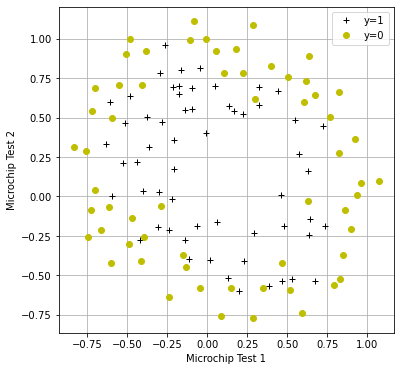

In [29]:
def plotData():
    plt.plot(pos[:,1],pos[:,2],'k+',label='y=1')
    plt.plot(neg[:,1],neg[:,2],'yo',label='y=0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)

#Draw it square to emphasize circular features
plt.figure(figsize=(6,6))
plotData()

#### 2.2 Feature mapping

In [31]:
#This code I took from someone else (the OCTAVE equivalent was provided in the HW)
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):  # 6
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [35]:
for i in range(1, 7):
    print(i)

1
2
3
4
5
6


In [39]:
#Create feature-mapped X matrix
mappedX = mapFeature(X[:,1],X[:,2])
print("X:", X.shape)
print("X[:,1]:", X[:,1].shape)
print("mappedX:", mappedX.shape)
mappedX

X: (118, 3)
X[:,1]: (118,)
mappedX: (118, 28)


array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

#### 2.3 Cost function and gradient

In [40]:
#Cost function is the same as the one implemented above, as I included the regularization
#toggled off for default function call (lambda = 0)
#I do not need separate implementation of the derivative term of the cost function
#Because the scipy optimization function I'm using only needs the cost function itself
#Let's check that the cost function returns a cost of 0.693 with zeros for initial theta,
#and regularized x values
initial_theta = np.zeros((mappedX.shape[1],1))
computeCost(initial_theta,mappedX,y)

0.6931471805599454

##### 2.3.1 Learning parameters using fminunc

In [41]:
#I noticed that fmin wasn't converging (passing max # of iterations)
#so let's use minimize instead

def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
theta, mincost = optimizeRegularizedTheta(initial_theta,mappedX,y)

#### 2.4 Plotting the decision boundary

In [51]:
np.linspace(-1,1.5,50)

array([-1.        , -0.94897959, -0.89795918, -0.84693878, -0.79591837,
       -0.74489796, -0.69387755, -0.64285714, -0.59183673, -0.54081633,
       -0.48979592, -0.43877551, -0.3877551 , -0.33673469, -0.28571429,
       -0.23469388, -0.18367347, -0.13265306, -0.08163265, -0.03061224,
        0.02040816,  0.07142857,  0.12244898,  0.17346939,  0.2244898 ,
        0.2755102 ,  0.32653061,  0.37755102,  0.42857143,  0.47959184,
        0.53061224,  0.58163265,  0.63265306,  0.68367347,  0.73469388,
        0.78571429,  0.83673469,  0.8877551 ,  0.93877551,  0.98979592,
        1.04081633,  1.09183673,  1.14285714,  1.19387755,  1.24489796,
        1.29591837,  1.34693878,  1.39795918,  1.44897959,  1.5       ])

In [ ]:
#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))

In [60]:
nx, ny = (3, 2)
print(np.linspace(0, 1, nx))
print(np.linspace(0, 1, ny))

[0.  0.5 1. ]
[0. 1.]


In [61]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,mylambda)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
            #zvals[i][j] = 1 if expit(np.dot(theta,myfeaturesij.T)) >= 0.8 else 0
    zvals = zvals.transpose()

    #u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

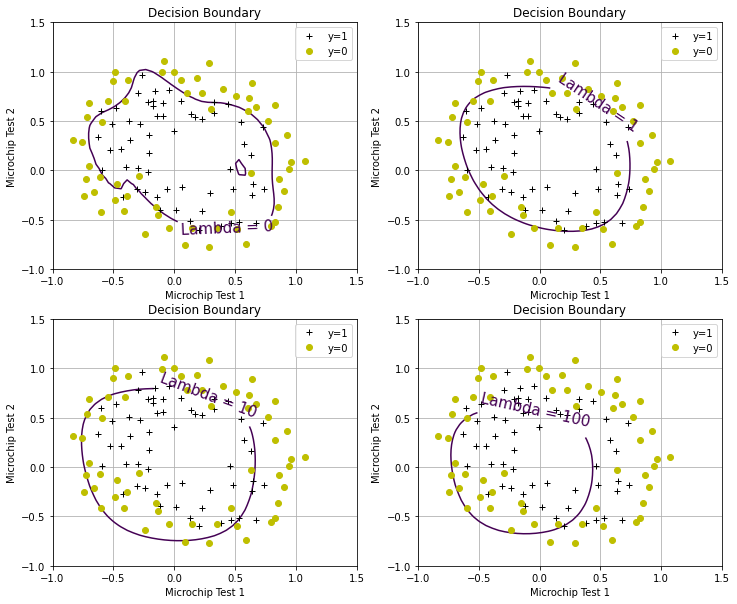

In [62]:
#Build a figure showing contours for various values of regularization parameter, lambda
#It shows for lambda=0 we are overfitting, and for lambda=100 we are underfitting
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData()
plotBoundary(theta,mappedX,y,0.)

plt.subplot(222)
plotData()
plotBoundary(theta,mappedX,y,1.)

plt.subplot(223)
plotData()
plotBoundary(theta,mappedX,y,10.)

plt.subplot(224)
plotData()
plotBoundary(theta,mappedX,y,100.)